# Pymaceuticals Inc.
---

### Analysis

- Capomulin is a very effective drug compared to Infubinol and Ceftamin, and about equally as effective as Ramicane.
- The heavier the mouse was, the bigger the tumor was (with astonishing correlation) so lose weight to beat cancer.
- Capomulin seemed to taper off in effectiveness for some mice near the end of treatment, so maybe consider alternatives at that time.
 

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df_with_duplicate = pd.merge(mouse_metadata, study_results, how="outer", on = "Mouse ID")

# Display the data table for preview
mouse_df_with_duplicate.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [95]:
# Checking the number of mice.
len(mouse_df_with_duplicate['Mouse ID'].unique())

249

In [96]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Author's note (AN): Used code from https://www.statology.org/pandas-find-duplicates/
duplicate_mice = mouse_df_with_duplicate[mouse_df_with_duplicate.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID']
duplicate_mice.unique()

array(['g989'], dtype=object)

In [97]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989 = mouse_df_with_duplicate.loc[mouse_df_with_duplicate['Mouse ID'] == 'g989']
mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [98]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Code replicated from 
mouse_df = mouse_df_with_duplicate.drop(mouse_df_with_duplicate.loc[mouse_df_with_duplicate['Mouse ID'] == 'g989'].index).reset_index()
mouse_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1


In [99]:
# Checking the number of mice in the clean DataFrame.
len(mouse_df["Mouse ID"].unique())

248

## Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_groupby = mouse_df.groupby(['Drug Regimen'])
drug_df = pd.DataFrame()
drug_df['Mean Tumor Volume'] = mouse_groupby['Tumor Volume (mm3)'].mean()
drug_df['Median Tumor Volume'] = mouse_groupby['Tumor Volume (mm3)'].median()
drug_df['Tumor Volume Variance'] = mouse_groupby['Tumor Volume (mm3)'].var()
drug_df['Tumor Volume Standard Dev.'] = mouse_groupby['Tumor Volume (mm3)'].std()
drug_df['Tumor Volume SEM'] = mouse_groupby['Tumor Volume (mm3)'].sem()
drug_df
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot: xlabel='Drug Regimen', ylabel='Number of Timepoints'>

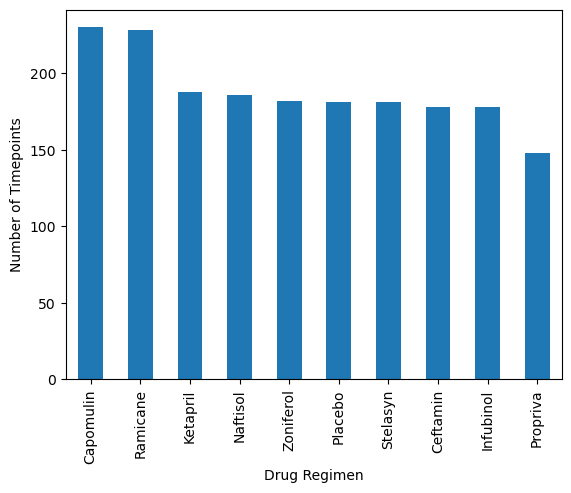

In [101]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
figure_1 = mouse_groupby['Mouse ID'].count().sort_values(ascending = False).plot(kind = 'bar', ylabel = 'Number of Timepoints')
figure_1

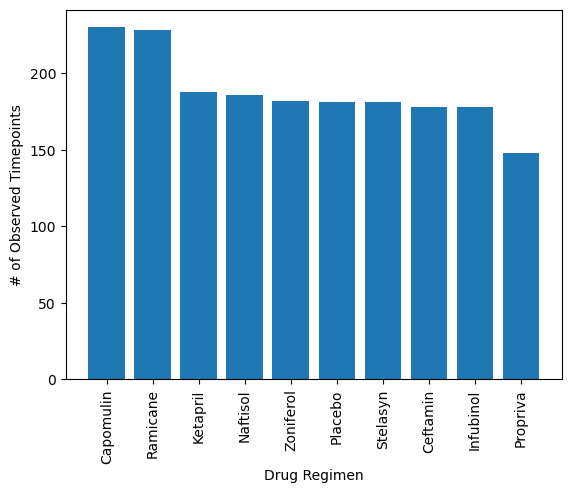

In [102]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_bar_plt = mouse_groupby['Mouse ID'].count().sort_values(ascending = False).reset_index()
x_axis = mouse_bar_plt['Drug Regimen']
y_axis = mouse_bar_plt['Mouse ID']
plt.bar(x_axis, y_axis)
plt.ylabel('# of Observed Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot: ylabel='Sex'>

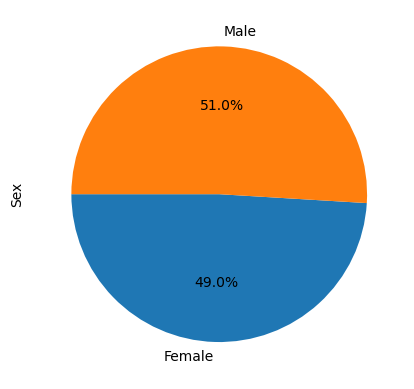

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_ids = mouse_df.groupby(['Sex'])
figure_2 = mouse_ids['Mouse ID'].count().plot(kind = 'pie', ylabel = 'Sex', autopct="%1.1f%%", startangle=180)
figure_2

Text(0, 0.5, 'Sex')

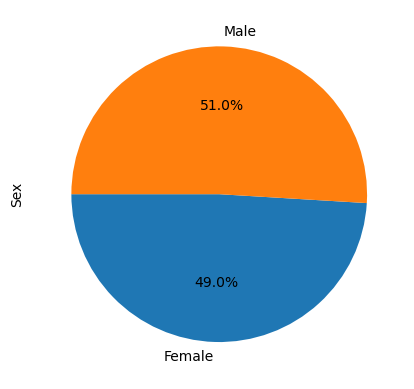

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_pie = mouse_ids['Mouse ID'].count().reset_index()
plt.pie(mouse_pie['Mouse ID'], labels = mouse_pie['Sex'], autopct="%1.1f%%", startangle=180)
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [105]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_id_df = mouse_df.groupby('Mouse ID')
mouse_id_groupby = mouse_id_df['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_df_2 = pd.merge(mouse_df, mouse_id_groupby, how = 'inner', on = ['Mouse ID', 'Timepoint'])
mouse_df_2

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,k403,Ramicane,Male,21,16,45,22.050126,1
1,19,s185,Capomulin,Female,3,17,45,23.343598,1
2,29,x401,Capomulin,Female,16,15,45,28.484033,0
3,39,m601,Capomulin,Male,22,17,45,28.430964,1
4,49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...,...
243,1859,z314,Stelasyn,Female,21,28,5,45.934712,0
244,1862,z435,Propriva,Female,12,26,10,48.710661,0
245,1872,z581,Infubinol,Female,24,25,45,62.754451,3
246,1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [106]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice = mouse_df_2.loc[mouse_df_2['Drug Regimen'] == treatment]
    tumor_volume.append(mice['Tumor Volume (mm3)'])
    
    # add subset 
    quartiles = mice['Tumor Volume (mm3)'].quantile([.25, .5, .75])
    
    # Determine outliers using upper and lower bounds
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lowerb = lowerq - 1.5*iqr
    upperb = upperq + 1.5*iqr
    outlier_row = mice[(mice['Tumor Volume (mm3)'] > upperb) | (mice['Tumor Volume (mm3)'] < lowerb)]
    outliers = [x for x in outlier_row['Mouse ID']]
    outlier_tumor_vol = [x for x in outlier_row['Tumor Volume (mm3)']]
    print(F"The outliers of {treatment} are mice {outliers} with tumor volumes (mm3) of {outlier_tumor_vol} respectively.")
    
    

The outliers of Capomulin are mice [] with tumor volumes (mm3) of [] respectively.
The outliers of Ramicane are mice [] with tumor volumes (mm3) of [] respectively.
The outliers of Infubinol are mice ['c326'] with tumor volumes (mm3) of [36.3213458] respectively.
The outliers of Ceftamin are mice [] with tumor volumes (mm3) of [] respectively.


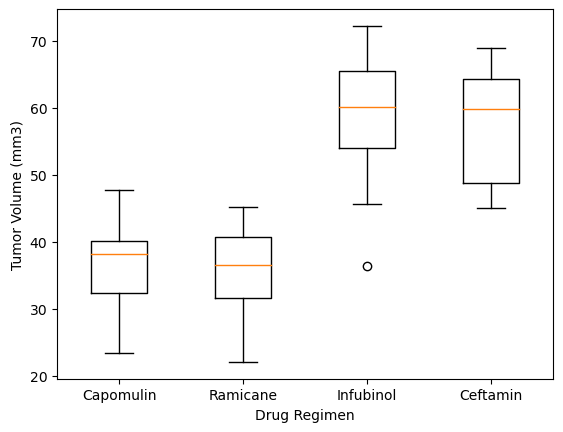

In [107]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume)
xticks = [1, 2, 3, 4]
plt.xticks(ticks = xticks, labels = treatments)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()


## Line and Scatter Plots

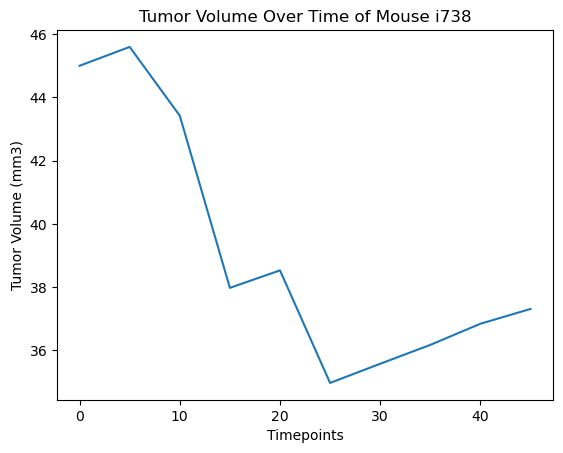

In [108]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# I chose mouse 'i738' for median-ish weight and tumor size
mouse_i738 = mouse_df.loc[mouse_df['Mouse ID'] == 'i738']
plt.plot(mouse_i738['Timepoint'], mouse_i738['Tumor Volume (mm3)'])
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Over Time of Mouse i738')
plt.show()

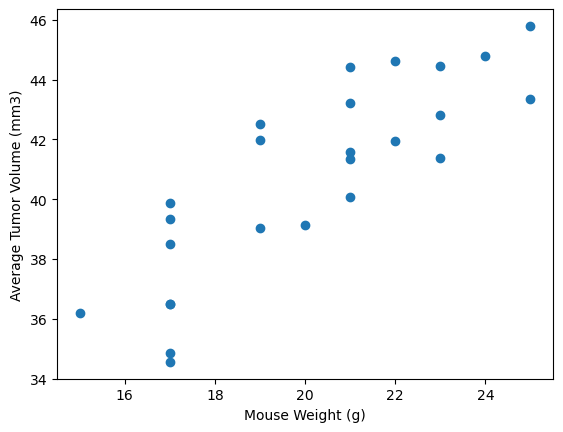

In [109]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capo_mice = mouse_df.loc[mouse_df['Drug Regimen'] == 'Capomulin']
Capo_mice_gb = Capo_mice.groupby(['Mouse ID'])
x_axis = Capo_mice_gb['Weight (g)'].mean()
y_axis = Capo_mice_gb['Tumor Volume (mm3)'].mean()
plt.scatter(x_axis, y_axis)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and tumor volume is 0.84 .


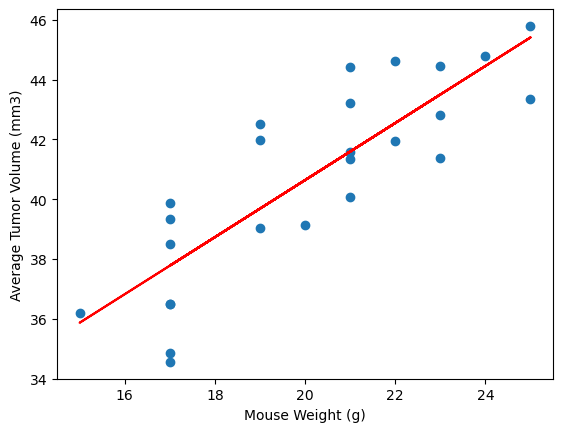

In [110]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Code in this section was due to a large part from the help of classmate Kevin Ng on our class DataFrame 'cheat sheet'
linearregression = st.linregress(x_axis, y_axis)
slope = linearregression[0]
intercept = linearregression[1]
regress_values = x_axis * slope + intercept #mx+b formula
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and tumor volume is {round(linearregression[2], 2)} .")